In [3]:
import cv2
import numpy as np

def extract_hog_features(image):
    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(image)
    return hog_features.flatten()

def extract_statistical_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean, std_dev = cv2.meanStdDev(gray_image)
    skewness = np.mean((gray_image - mean) ** 3)
    kurtosis = np.mean((gray_image - mean) ** 4)
    return np.concatenate([mean.flatten(), std_dev.flatten(), [skewness], [kurtosis]])

# Example usage
image_path = '2655_jpg.rf.1871903cc03ad2f30c75f9eed9a98fdc.jpg'
image = cv2.imread(image_path)

hog_features = extract_hog_features(image)
statistical_features = extract_statistical_features(image)

print('HOG Features:', hog_features)
print('Statistical Features:', statistical_features)



HOG Features: [0. 0. 0. ... 0. 0. 0.]
Statistical Features: [4.09825244e+01 4.94664667e+01 1.50364638e+05 2.11715188e+07]


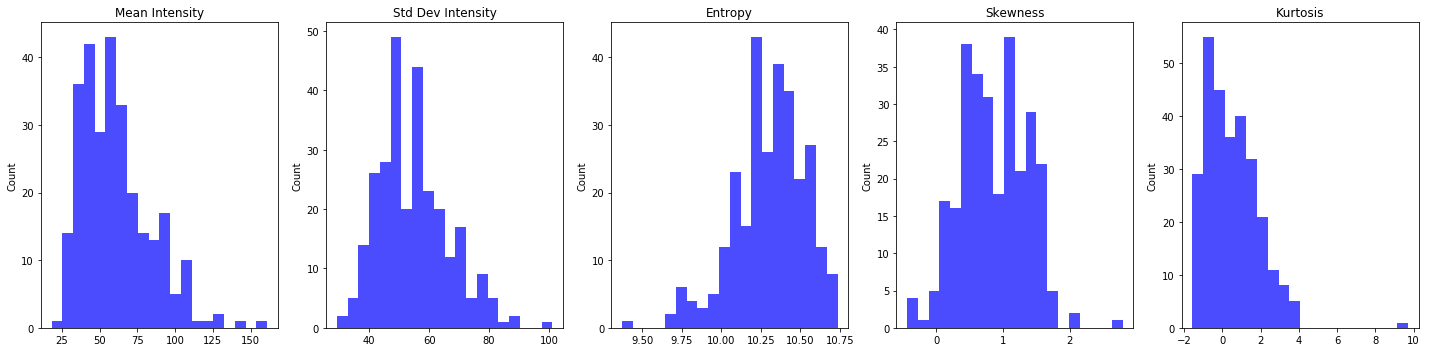

In [7]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.stats import entropy, skew, kurtosis

# Function to calculate image statistics
def calculate_image_statistics(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_intensity = np.mean(gray_image)
    std_dev_intensity = np.std(gray_image)
    entropy_value = entropy(gray_image.flatten())
    skewness_value = skew(gray_image.flatten())
    kurtosis_value = kurtosis(gray_image.flatten())
    return mean_intensity, std_dev_intensity, entropy_value, skewness_value, kurtosis_value

# Function to preprocess and calculate statistics for a set of images
def preprocess_and_calculate_statistics(images):
    stats = []
    for img_path in images:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))  # Resize for consistency
        stats.append(calculate_image_statistics(img))
    return np.array(stats)

# Paths to preprocessed images
path_no_tumor = './brain_tumor_dataset/no/*.jpg'
path_yes_tumor = './brain_tumor_dataset/yes/*.jpg'

# Get image paths using glob
X_train_pre_paths = glob.glob(path_no_tumor)
X_train_pre_paths += glob.glob(path_yes_tumor)

# Calculate statistics for the images
image_stats = preprocess_and_calculate_statistics(X_train_pre_paths)

# Plotting the statistics
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

labels = ['Mean Intensity', 'Std Dev Intensity', 'Entropy', 'Skewness', 'Kurtosis']
for i in range(5):
    axs[i].hist(image_stats[:, i], bins=20, color='blue', alpha=0.7)
    axs[i].set_title(labels[i])

# Set labels for the y-axis
for ax in axs.flat:
    ax.set(ylabel='Count')

plt.tight_layout()
plt.show()




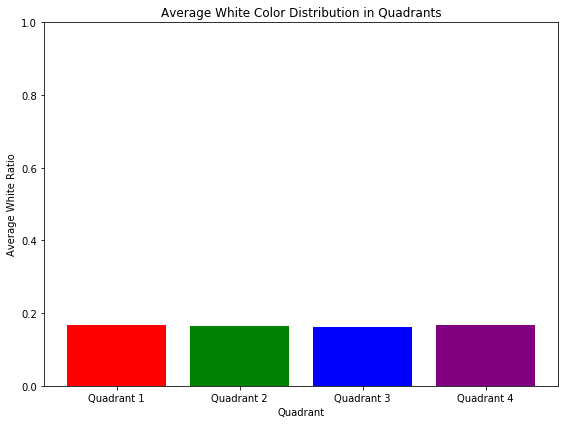

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load images from the specified path
image_paths = glob.glob('./brain_tumor_dataset/yes/*.jpg')
images = [cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) for img_path in image_paths]

# Define function to divide image into quadrants and calculate white ratio
def calculate_quadrant_white_ratio(image):
    height, width = image.shape
    half_height, half_width = height // 2, width // 2

    quadrant1 = image[:half_height, :half_width]
    quadrant2 = image[:half_height, half_width:]
    quadrant3 = image[half_height:, :half_width]
    quadrant4 = image[half_height:, half_width:]

    def calculate_white_ratio(quadrant):
        binary_image = cv2.threshold(quadrant, 127, 255, cv2.THRESH_BINARY)[1]
        white_ratio = np.sum(binary_image == 255) / (quadrant.shape[0] * quadrant.shape[1])
        return white_ratio

    white_ratios = [calculate_white_ratio(quadrant) for quadrant in [quadrant1, quadrant2, quadrant3, quadrant4]]
    return white_ratios

# Calculate white ratios for all images
all_white_ratios = [calculate_quadrant_white_ratio(img) for img in images]

# Compute average white ratios across all images
average_white_ratios = np.mean(all_white_ratios, axis=0)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.bar(range(1, 5), average_white_ratios, color=['red', 'green', 'blue', 'purple'])
plt.xlabel('Quadrant')
plt.ylabel('Average White Ratio')
plt.title('Average White Color Distribution in Quadrants')
plt.xticks(range(1, 5), ['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4'])
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for ratios

plt.tight_layout()
plt.show()


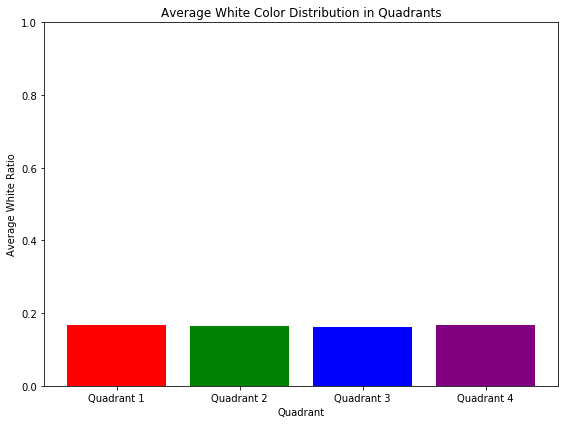

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load images from the specified path
image_paths = glob.glob('./brain_tumor_dataset/yes/*.jpg')
images = [cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) for img_path in image_paths]

# Define function to divide image into quadrants and calculate white ratio
def calculate_quadrant_white_ratio(image):
    height, width = image.shape
    half_height, half_width = height // 2, width // 2

    quadrant1 = image[:half_height, :half_width]
    quadrant2 = image[:half_height, half_width:]
    quadrant3 = image[half_height:, :half_width]
    quadrant4 = image[half_height:, half_width:]

    def calculate_white_ratio(quadrant):
        binary_image = cv2.threshold(quadrant, 127, 255, cv2.THRESH_BINARY)[1]
        white_ratio = np.sum(binary_image == 255) / (quadrant.shape[0] * quadrant.shape[1])
        return white_ratio

    white_ratios = [calculate_white_ratio(quadrant) for quadrant in [quadrant1, quadrant2, quadrant3, quadrant4]]
    return white_ratios

# Calculate white ratios for all images
all_white_ratios = [calculate_quadrant_white_ratio(img) for img in images]

# Compute average white ratios across all images
average_white_ratios = np.mean(all_white_ratios, axis=0)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.bar(range(1, 5), average_white_ratios, color=['red', 'green', 'blue', 'purple'])
plt.xlabel('Quadrant')
plt.ylabel('Average White Ratio')
plt.title('Average White Color Distribution in Quadrants')
plt.xticks(range(1, 5), ['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4'])
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for ratios

plt.tight_layout()
plt.show()


C:\Users\user\anaconda3\envs\MRI\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


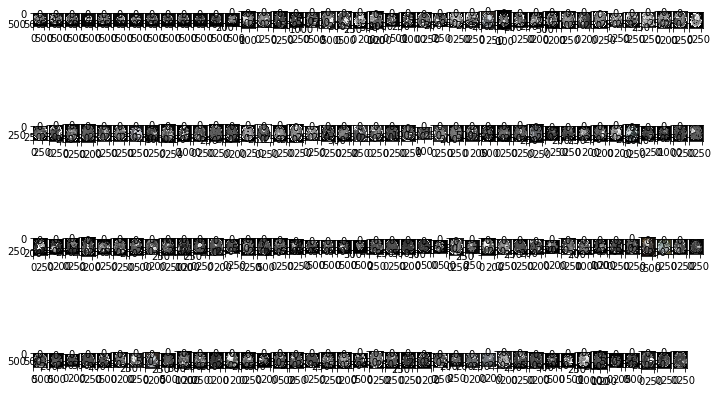

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load images from the specified path
image_paths = glob.glob('./brain_tumor_dataset/yes/*.jpg')
images = [cv2.imread(img_path) for img_path in image_paths]

def find_tumor_centers(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to extract tumor areas
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours of tumor regions
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    tumor_centers = []
    for contour in contours:
        # Calculate center of each contour (tumor region)
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            tumor_centers.append((cX, cY))

    return tumor_centers

# Calculate tumor centers for all images
all_tumor_centers = [find_tumor_centers(img) for img in images]

# Plotting the images with tumor centers marked
num_images = len(images)
rows = 4
cols = (num_images + rows - 1) // rows  # Calculate number of columns

plt.figure(figsize=(12, 8))
for i, (image, centers) in enumerate(zip(images, all_tumor_centers), 1):
    plt.subplot(rows, cols, i)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

    # Mark tumor centers on the image
    for center in centers:
        cv2.circle(image, center, 5, (255, 0, 0), -1)  # Mark in blue color

plt.tight_layout()
plt.show()


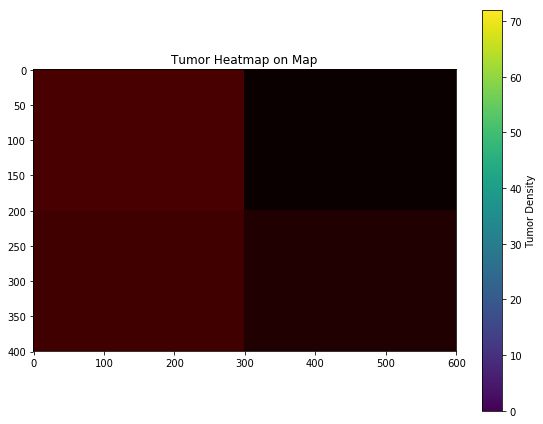

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load images from the specified path
image_paths = glob.glob('./brain_tumor_dataset/yes/*.jpg')
images = [cv2.imread(img_path) for img_path in image_paths]

def find_tumor_centers(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to extract tumor areas
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours of tumor regions
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    tumor_centers = []
    for contour in contours:
        # Calculate center of each contour (tumor region)
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            tumor_centers.append((cX, cY))

    return tumor_centers

# Calculate tumor centers for all images
all_tumor_centers = [find_tumor_centers(img) for img in images]

# Create a map divided into four pieces
map_height, map_width = 400, 600  # Adjust size as needed
map_image = np.zeros((map_height, map_width, 3), dtype=np.uint8)

# Divide the map into quadrants and count tumor centers in each quadrant
quadrant_counts = np.zeros((2, 2), dtype=int)  # 2x2 grid for quadrants
quadrant_height, quadrant_width = map_height // 2, map_width // 2
for centers in all_tumor_centers:
    for center in centers:
        x, y = center
        # Determine which quadrant the tumor center belongs to
        row_index = 1 if y >= quadrant_height else 0
        col_index = 1 if x >= quadrant_width else 0
        quadrant_counts[row_index, col_index] += 1

# Create heatmap on the map based on tumor center counts in each quadrant
max_count = np.max(quadrant_counts)
heatmap = np.zeros((map_height, map_width), dtype=np.uint8)
for i in range(2):
    for j in range(2):
        count = quadrant_counts[i, j]
        color_intensity = int(255 * count / max_count)
        heatmap[i * quadrant_height:(i + 1) * quadrant_height,
                j * quadrant_width:(j + 1) * quadrant_width] = color_intensity

# Overlay heatmap on the map
map_image[:, :, 0] = heatmap  # Set heatmap as blue channel (BGR)
map_image = cv2.applyColorMap(map_image, cv2.COLORMAP_HOT)  # Apply colormap for visualization

# Plotting the map with tumor heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(map_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('Tumor Heatmap on Map')
plt.colorbar(label='Tumor Density')

plt.tight_layout()
plt.show()


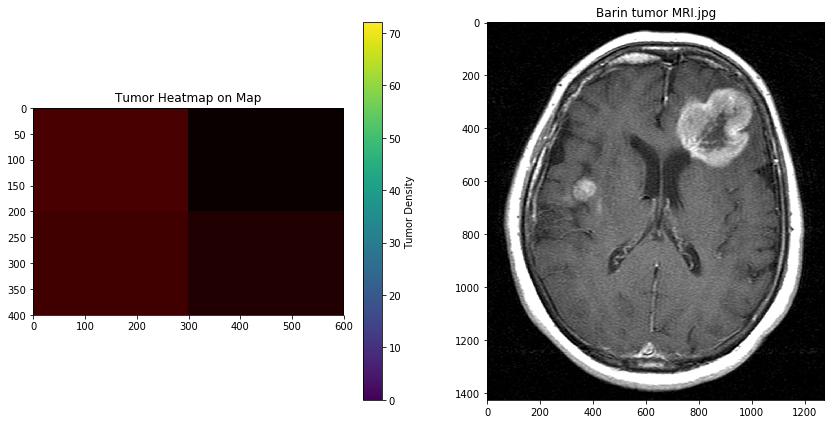

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load images from the specified path
image_paths = glob.glob('./brain_tumor_dataset/yes/*.jpg')
images = [cv2.imread(img_path) for img_path in image_paths]

def find_tumor_centers(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to extract tumor areas
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours of tumor regions
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    tumor_centers = []
    for contour in contours:
        # Calculate center of each contour (tumor region)
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            tumor_centers.append((cX, cY))

    return tumor_centers

# Calculate tumor centers for all images
all_tumor_centers = [find_tumor_centers(img) for img in images]

# Create a map divided into four pieces
map_height, map_width = 400, 600  # Adjust size as needed
map_image = np.zeros((map_height, map_width, 3), dtype=np.uint8)

# Divide the map into quadrants and count tumor centers in each quadrant
quadrant_counts = np.zeros((2, 2), dtype=int)  # 2x2 grid for quadrants
quadrant_height, quadrant_width = map_height // 2, map_width // 2
for centers in all_tumor_centers:
    for center in centers:
        x, y = center
        # Determine which quadrant the tumor center belongs to
        row_index = 1 if y >= quadrant_height else 0
        col_index = 1 if x >= quadrant_width else 0
        quadrant_counts[row_index, col_index] += 1

# Create heatmap on the map based on tumor center counts in each quadrant
max_count = np.max(quadrant_counts)
heatmap = np.zeros((map_height, map_width), dtype=np.uint8)
for i in range(2):
    for j in range(2):
        count = quadrant_counts[i, j]
        color_intensity = int(255 * count / max_count)
        heatmap[i * quadrant_height:(i + 1) * quadrant_height,
                j * quadrant_width:(j + 1) * quadrant_width] = color_intensity

# Overlay heatmap on the map
map_image[:, :, 0] = heatmap  # Set heatmap as blue channel (BGR)
map_image = cv2.applyColorMap(map_image, cv2.COLORMAP_HOT)  # Apply colormap for visualization

# Load and display the image Y41.jpg
image_y41 = cv2.imread('./brain_tumor_dataset/yes/Y41.jpg')
plt.figure(figsize=(12, 6))

# Plotting the map with tumor heatmap
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(map_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('Tumor Heatmap on Map')
plt.colorbar(label='Tumor Density')

# Plotting the image Y41.jpg
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_y41, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('Barin tumor MRI.jpg')

plt.tight_layout()
plt.show()


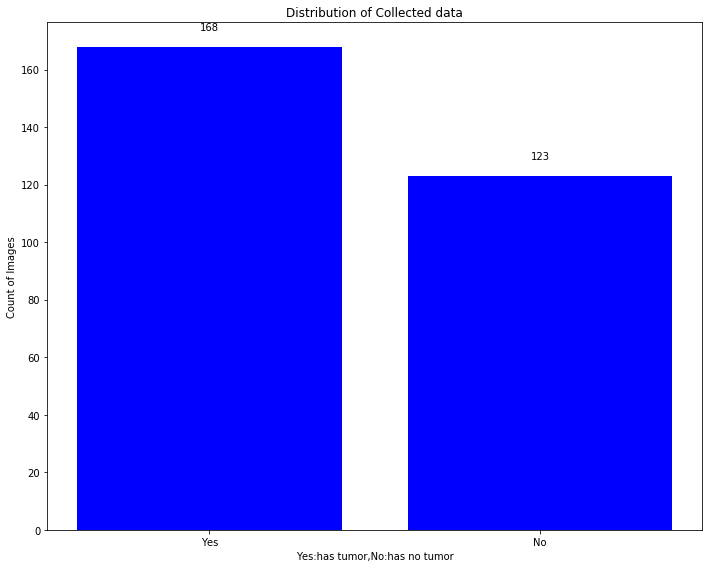

In [23]:
import matplotlib.pyplot as plt

# Define the counts for 'yes' and 'no' categories
counts = {'Yes': 168, 'No': 123}

# Extract category labels and counts
categories = list(counts.keys())
values = list(counts.values())

# Plotting the histogram
plt.figure(figsize=(10, 8))
plt.bar(categories, values, color=['blue', 'BLUE'])
plt.xlabel('Yes:has tumor,No:has no tumor')
plt.ylabel('Count of Images')
plt.title('Distribution of Collected data')


# Adding text labels above each bar
for i, value in enumerate(values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()